<a href="https://colab.research.google.com/github/ZalakPatel14/Crop-Yield-Prediction-using-Machine-Learning-Algorithms/blob/main/Zalak_Patel_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
import os
import missingno
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the dataset for our prediction
pesticides_d=pd.read_csv('/content/drive/MyDrive/ML DATASET/pesticides.csv')
rainfall_d=pd.read_csv('/content/drive/MyDrive/ML DATASET/rainfall.csv')
temp_d=pd.read_csv('/content/drive/MyDrive/ML DATASET/temp.csv')
yield_d=pd.read_csv('/content/drive/MyDrive/ML DATASET/yield.csv')
yield_df=pd.read_csv('/content/drive/MyDrive/ML DATASET/yield_df.csv')

In [ ]:
# dimensions of the dataset
print(f'pesticides_d={pesticides_d.shape[0]} Rows,{pesticides_d.shape[1]}columns.')
print(f'rainfall_d={rainfall_d.shape[0]} Rows,{rainfall_d.shape[1]}columns.')
print(f'temp_d={temp_d.shape[0]} Rows,{temp_d.shape[1]}columns.')
print(f'yield_d={yield_d.shape[0]} Rows,{yield_d.shape[1]}columns.')
print(f'yield_df={yield_df.shape[0]} Rows,{yield_df.shape[1]}columns.')

pesticides_d=4349 Rows,7columns.
rainfall_d=6727 Rows,3columns.
temp_d=71311 Rows,3columns.
yield_d=56717 Rows,12columns.
yield_df=28242 Rows,8columns.


In [ ]:
# information of all dataset
pesticides_d.info()
rainfall_d.info()
temp_d.info()
yield_d.info()
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB
<class 'pandas.core.frame.DataFrame

In [ ]:
# select necessary columns from all dataset to make a dataframe
# columns needed from yield_data dataset (we need area, item, year, value)
needed = ['Area','Item','Year','Value']
yield_d = yield_d[needed]
yield_d.head()
# columns needed from temp_data (we need all of them but we need to change the column name)
temp_d.rename(columns = {'year':'Year','country':'Area'}, inplace = True)
temp_d.head()
# columns needed from rainfall (we need all of them)
rainfall_d.head()
# columns needed from pesticides(we need area, year, value)
needed = ['Area','Year','Value']
pesticides_d = pesticides_d[needed]
pesticides_d.head()

,Area,Year,Value
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [ ]:
# dimensions of dataset
print("pesticides:",pesticides_d.shape)
print("rainfall:",rainfall_d.shape)
print("temp:",temp_d.shape)
print("yield:",yield_d.shape)

pesticides: (4349, 3)
rainfall: (6727, 3)
temp: (71311, 3)
yield: (56717, 4)


In [ ]:
# we need to merge them on year & area
temp_d= temp_d[temp_d.Year >= 1961]
yield_main = pd.merge(yield_d,temp_d,on=['Year','Area'])
yield_main = pd.merge(yield_main,pesticides_d,on=['Year','Area'])
yield_main.rename(columns = {'Value_x':'Yield_Value','Value_y':'Pesticides_Value'}, inplace = True)
rainfall_d.rename(columns = {' Area':'Area'}, inplace = True)
yield_main = pd.merge(yield_main,rainfall_d,on=['Year','Area'])
yield_main.rename(columns = {'average_rain_fall_mm_per_year':'average_rain'}, inplace = True)

# removing rows that have atleast one missing value
yield_main=yield_main.dropna()
yield_main.info()

# comparing yeild_df with yield_final
yield_df.info()

# it is seen that our data are similar to prepared data so we will work on our data
yield_main = yield_main[['Area','Item','Year','avg_temp','Pesticides_Value','average_rain','Yield_Value']]
yield_main

yield_main.head()
#there is no nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28248 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              28248 non-null  object 
 1   Item              28248 non-null  object 
 2   Year              28248 non-null  int64  
 3   Yield_Value       28248 non-null  int64  
 4   avg_temp          28248 non-null  float64
 5   Pesticides_Value  28248 non-null  float64
 6   average_rain      28248 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value
0,Albania,Maize,1990,16.37,121.0,1485,36613
1,Albania,Potatoes,1990,16.37,121.0,1485,66667
2,Albania,"Rice, paddy",1990,16.37,121.0,1485,23333
3,Albania,Sorghum,1990,16.37,121.0,1485,12500
4,Albania,Soybeans,1990,16.37,121.0,1485,7000


In [ ]:
# performing statistical Analysis
yield_main.describe()

,Year,avg_temp,Pesticides_Value,Yield_Value
count,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,20.543722,37069.136973,77047.863282
std,7.052997,6.311828,59954.787836,84950.194454
min,1990.000000,1.300000,0.040000,50.000000
25%,1995.000000,16.710000,1695.710000,19918.750000
50%,2001.000000,21.510000,17517.760000,38295.000000
75%,2008.000000,26.000000,48687.880000,104598.250000
max,2013.000000,30.650000,367778.000000,501412.000000


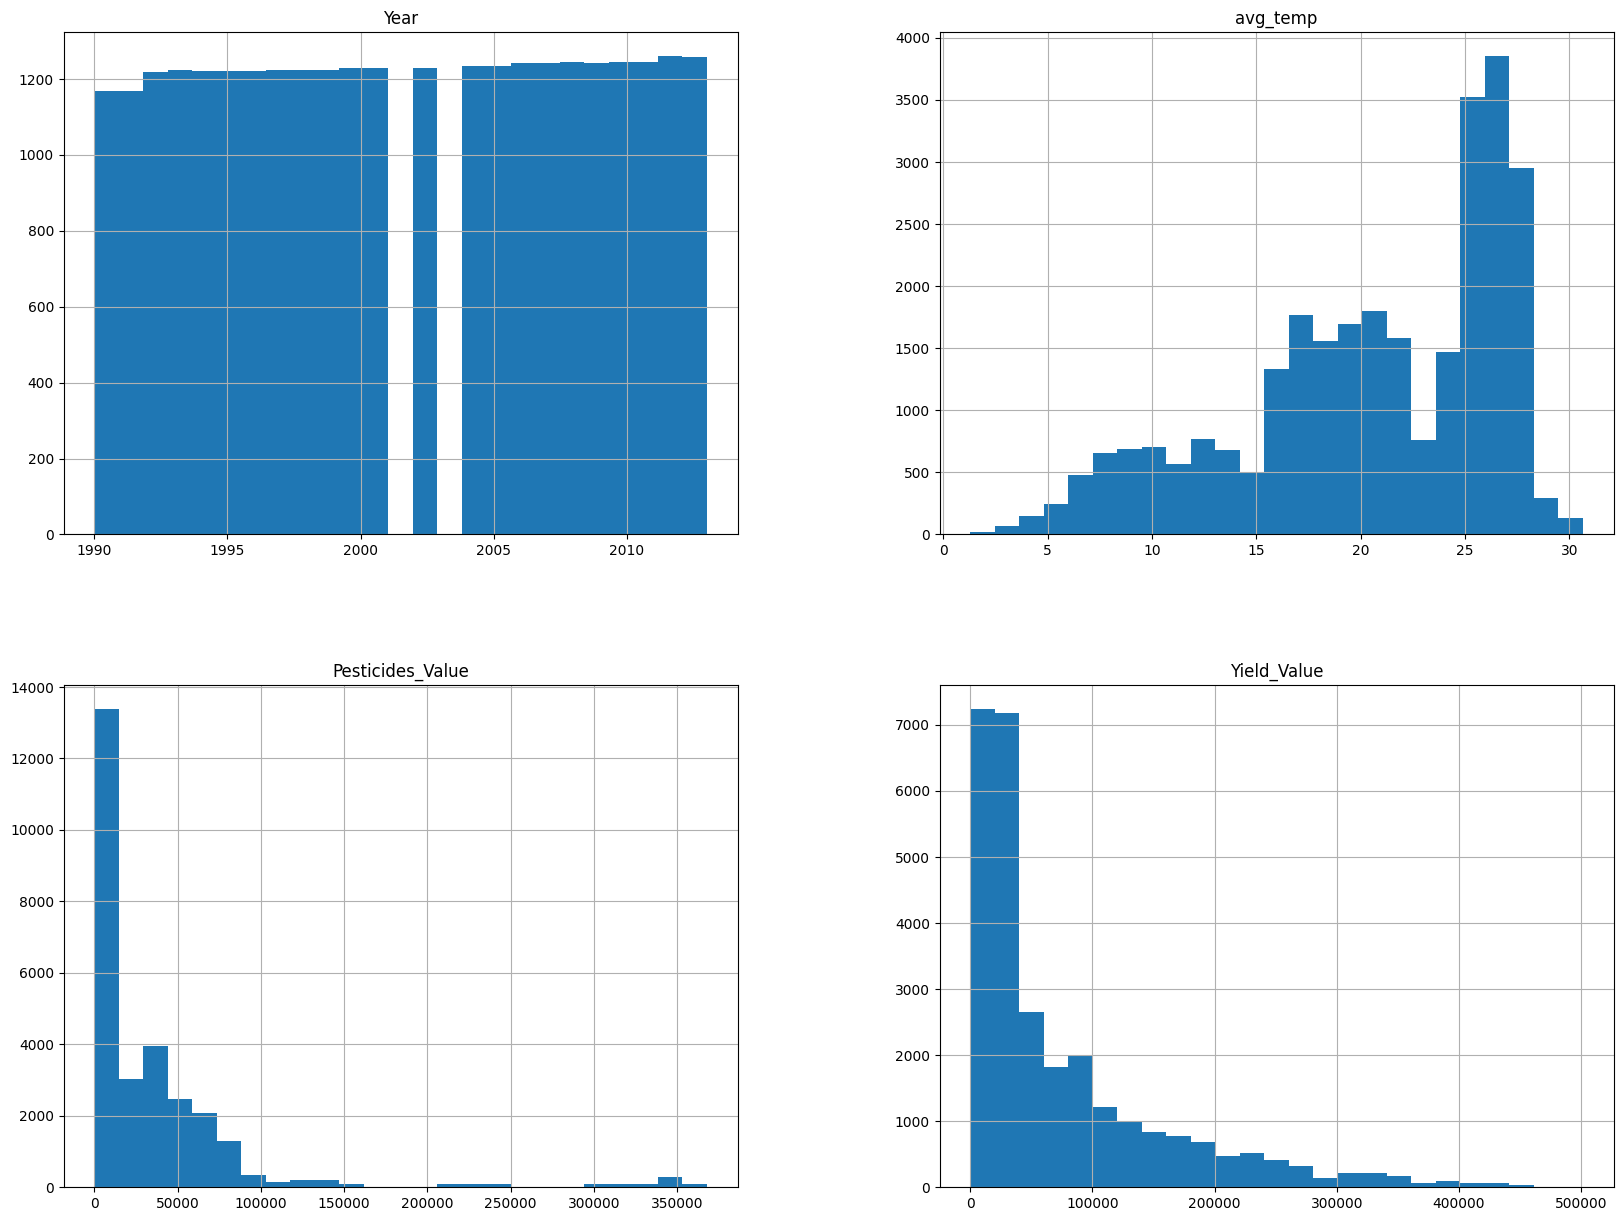

In [ ]:
# data visualization

# histogram on our final data
yield_main.hist(bins = 25,figsize=(20,15));

In [ ]:
# Converting categorical labels into numerical labels
data_final=yield_main.copy()
from sklearn.preprocessing import LabelEncoder
categorical_columns = data_final.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    data_final[column] = label_encoder.fit_transform(data_final[column])

data_final.head()

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value,Pesticides_log
0,0,1,1990,16.37,121.0,21,36613,4.795791
1,0,3,1990,16.37,121.0,21,66667,4.795791
2,0,4,1990,16.37,121.0,21,23333,4.795791
3,0,5,1990,16.37,121.0,21,12500,4.795791
4,0,6,1990,16.37,121.0,21,7000,4.795791


<Axes: >

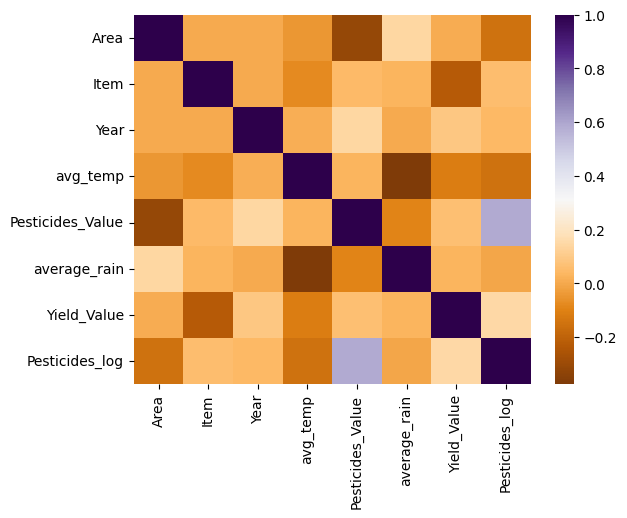

In [ ]:
# Data Visualization
sns.heatmap(data_final.corr() , cmap='PuOr')

In [ ]:
# computing the correlation matrix between data_final and Yield_Value
corr_matrix = data_final.corr()
corr_matrix["Yield_Value"].sort_values(ascending=False)

Yield_Value         1.000000
Pesticides_log      0.146772
Year                0.091703
Pesticides_Value    0.064120
average_rain        0.028144
Area                0.006763
avg_temp           -0.114818
Item               -0.225058
Name: Yield_Value, dtype: float64

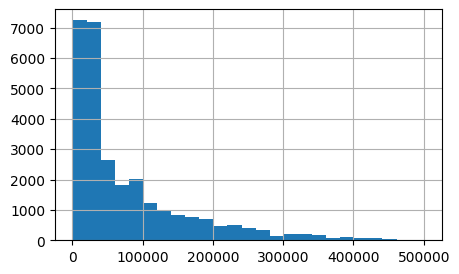

In [ ]:
# stratified sampling
data_final['Yield_Value'].hist(bins = 25 , figsize=(5,3));

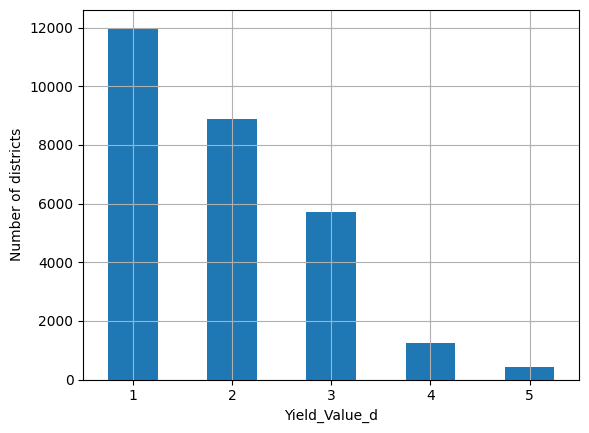

In [ ]:
# Segmenting Yield Values into Bins and Visualizing District Distribution
data_final["Yield_Value_d"] = pd.cut(data_final["Yield_Value"],
 bins=[0.,30000, 100000,250000, 350000.,np.inf],
 labels=[1, 2, 3, 4, 5])

data_final["Yield_Value_d"].value_counts().sort_index().plot.bar(rot=0,
grid=True)
plt.xlabel("Yield_Value_d")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
# train test split of data
strat_train_set, strat_test_set = train_test_split(
data_final, test_size=0.1, stratify=data_final["Yield_Value_d"],random_state=1812)

strat_test_set["Yield_Value_d"].value_counts()/len(strat_test_set)

1    0.424779
2    0.314690
3    0.201770
4    0.044248
5    0.014513
Name: Yield_Value_d, dtype: float64

In [ ]:
train_set, test_set = train_test_split(data_final, test_size=0.1,random_state=1812)

test_set["Yield_Value_d"].value_counts()/len(test_set)

1    0.412035
2    0.316106
3    0.218407
4    0.042478
5    0.010973
Name: Yield_Value_d, dtype: float64

In [ ]:
# preparing the data for machine learning by separating the features (independent variables) and the target variable

X = data_final.drop("Yield_Value", axis=1)
Y = data_final["Yield_Value"].copy()

In [ ]:
# make test set
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.1, stratify=data_final["Yield_Value_d"],random_state=1812)

In [ ]:
# Scaling

std_scaler = StandardScaler()
X_train_sc = std_scaler.fit_transform(X_train)

X_test_sc = std_scaler.transform(X_test)

The accuracy of the Linear_Regression Model Train is 85.68
The accuracy of the  Linear_Regression Model Test is 85.83


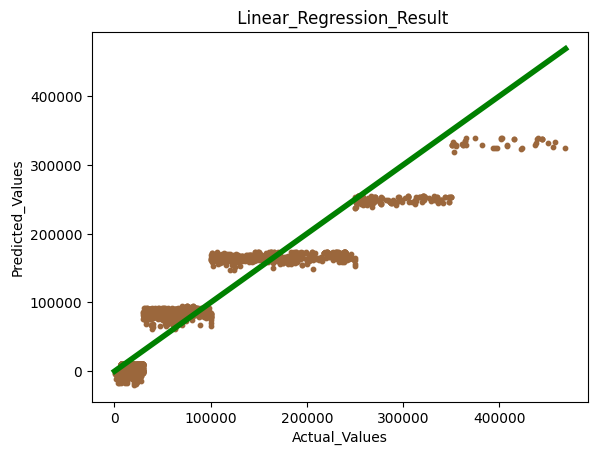

The accuracy of the Random_Forest Model Train is 99.91
The accuracy of the  Random_Forest Model Test is 99.25


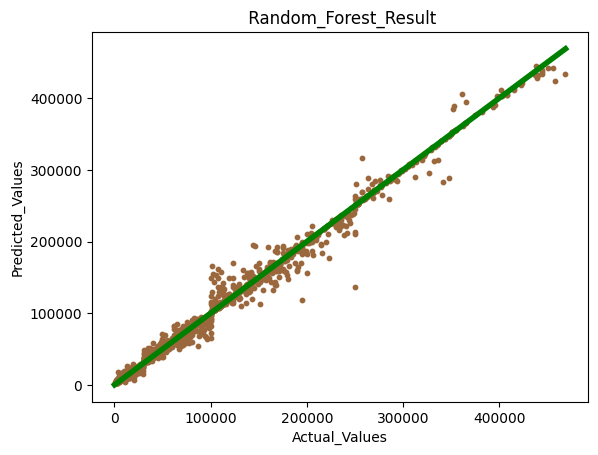

The accuracy of the KNN Model Train is 99.32
The accuracy of the  KNN Model Test is 98.85


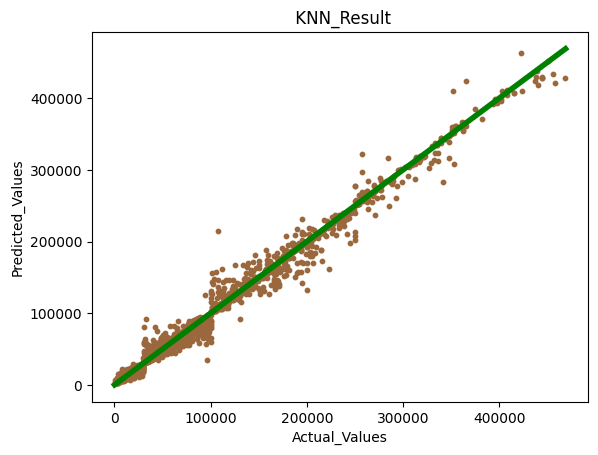

The accuracy of the Decision_Tree Model Train is 100.00
The accuracy of the  Decision_Tree Model Test is 98.67


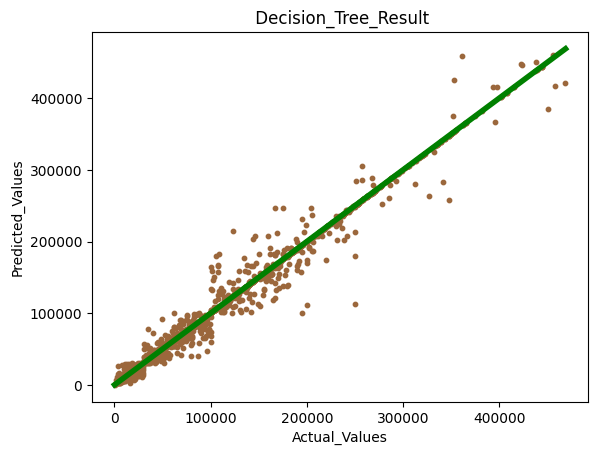

,Model,Accuracy,MSE,R2_score,MAE,MAPE
0,Linear_Regression,0.858323,1006371396.227161,0.858323,25054.838857,0.639267
1,Random_Forest,0.992549,52928844.613806,0.992549,2797.093381,0.073226
2,KNN,0.988515,81584357.902117,0.988515,4425.103363,0.122505
3,Decision_Tree,0.986664,94725914.351150,0.986664,3079.608496,0.064380


In [ ]:
# ML ALGORITHMS

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

results = []

models = [
    ('Linear_Regression', LinearRegression()),
    ('Random_Forest', RandomForestRegressor(random_state=1812)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision_Tree', DecisionTreeRegressor(random_state=1812)),
]

for name, model in models:
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)

    accuracy = model.score(X_test_sc, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)

    results.append((name, accuracy, MSE, R2_score, MAE, MAPE))

    acc = (model.score(X_train_sc , y_train) * 100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc = (model.score(X_test_sc , y_test) * 100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')

    plt.scatter(y_test, y_pred, s=10, color='#9B673C')
    plt.xlabel('Actual_Values')
    plt.ylabel('Predicted_Values')
    plt.title(f' {name}_Result')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)
    plt.show()

# Create DataFrame for results
dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score', 'MAE', 'MAPE'])

# Style DataFrame
df_styled_best = dff.style.highlight_max(subset=['Accuracy', 'R2_score'], color='green') \
                            .highlight_min(subset=['MSE'], color='green') \
                            .highlight_max(subset=['MSE'], color='red') \
                            .highlight_min(subset=['Accuracy', 'R2_score'], color='red') \
                            .highlight_min(subset=['MAE'], color='blue') \
                            .highlight_min(subset=['MAPE'], color='purple')

# Display styled DataFrame
display(df_styled_best)


Best parameters for Linear_Regression: {}
The accuracy of the Linear_Regression Model Train is 85.68
The accuracy of the Linear_Regression Model Test is 85.83


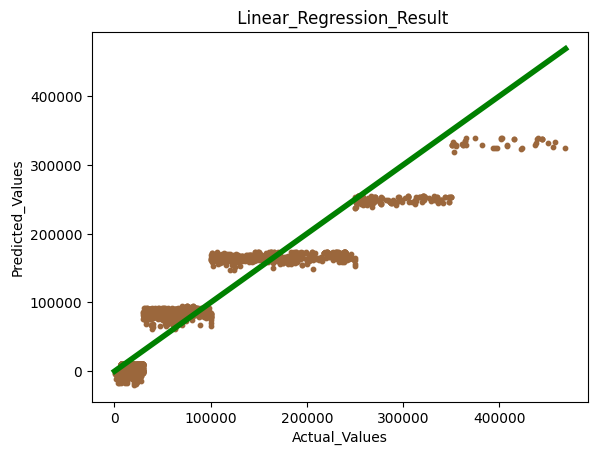

Best parameters for Random_Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
The accuracy of the Random_Forest Model Train is 99.91
The accuracy of the Random_Forest Model Test is 99.26


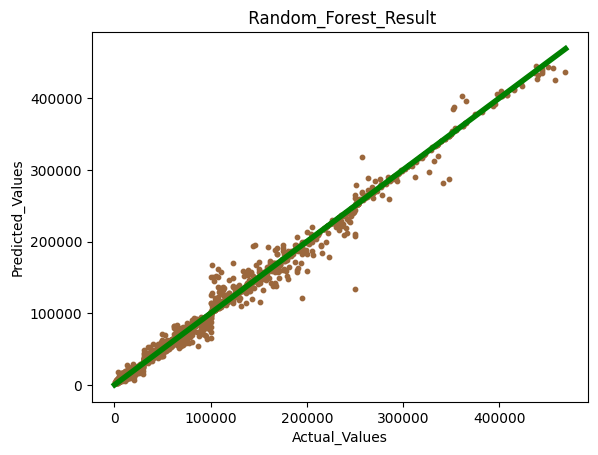

Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
The accuracy of the KNN Model Train is 100.00
The accuracy of the KNN Model Test is 99.11


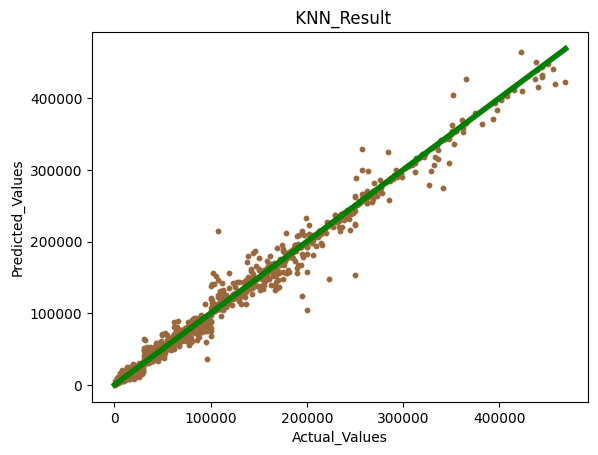

Best parameters for Decision_Tree: {'max_depth': 20, 'min_samples_split': 2}
The accuracy of the Decision_Tree Model Train is 99.98
The accuracy of the Decision_Tree Model Test is 98.76


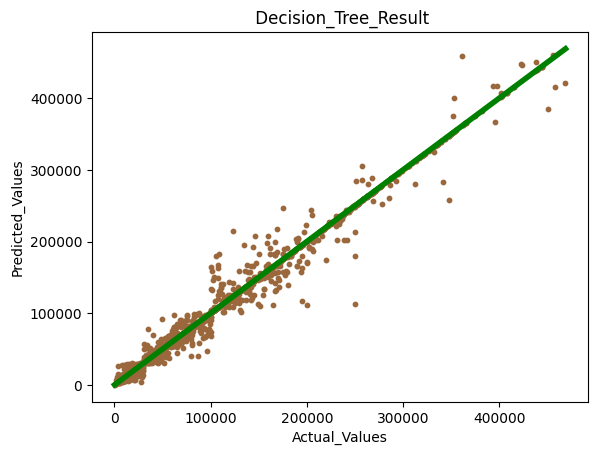

,Model,Accuracy,MSE,R2_score,MAE,MAPE
0,Linear_Regression,0.858323,1006371396.227161,0.858323,25054.838857,0.639267
1,Random_Forest,0.992589,52639297.605546,0.992589,2780.497419,0.074202
2,KNN,0.991077,63382390.109101,0.991077,3150.263718,0.083496
3,Decision_Tree,0.987621,87934492.384265,0.987621,3058.073206,0.065691


In [ ]:
# Hpyerparameter Tuning for better Evaluation
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
param_grid = {
    'Linear_Regression': {},
    'Random_Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Decision_Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

# Perform Grid Search and hyperparameter tuning
results = []
best_models = {}

for name, model in models:
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_sc, y_train)
        best_model = grid_search.best_estimator_
        best_models[name] = best_model
        best_params = grid_search.best_params_
        print(f"Best parameters for {name}: {best_params}")

    else:
        best_model = model
        best_models[name] = best_model

    best_model.fit(X_train_sc, y_train)
    y_pred = best_model.predict(X_test_sc)
    accuracy = best_model.score(X_test_sc, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score, MAE, MAPE))

    acc_train = (best_model.score(X_train_sc , y_train) * 100)
    print(f'The accuracy of the {name} Model Train is {acc_train:.2f}')
    acc_test = (best_model.score(X_test_sc , y_test) * 100)
    print(f'The accuracy of the {name} Model Test is {acc_test:.2f}')

    plt.scatter(y_test, y_pred, s=10, color='#9B673C')
    plt.xlabel('Actual_Values')
    plt.ylabel('Predicted_Values')
    plt.title(f' {name}_Result')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)
    plt.show()

# Create DataFrame for results
dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score', 'MAE', 'MAPE'])

# Style DataFrame
df_styled_best = dff.style.highlight_max(subset=['Accuracy', 'R2_score'], color='green') \
                            .highlight_min(subset=['MSE'], color='green') \
                            .highlight_max(subset=['MSE'], color='red') \
                            .highlight_min(subset=['Accuracy', 'R2_score'], color='red') \
                            .highlight_min(subset=['MAE'], color='blue') \
                            .highlight_min(subset=['MAPE'], color='purple')

# Display styled DataFrame
display(df_styled_best)

In [ ]:
# Better Evaluation Using Cross-Validation

from sklearn.model_selection import cross_val_score

results = []
#cross =[]
models = [
    ('Linear_Regression', LinearRegression()),
    ('Random_Forest', RandomForestRegressor(random_state=1812)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision_Tree',DecisionTreeRegressor(random_state=1812)),
          ]

for name, model in models:
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    model_rmses = -cross_val_score(model, X_test_sc, y_test,
    scoring="neg_root_mean_squared_error", cv=10)
    print (f'CROSS VALIDATION {name} MODEL')
    print (pd.Series(model_rmses).describe())

CROSS VALIDATION Linear_Regression MODEL
count       10.000000
mean     31764.901002
std        794.641453
min      30864.281047
25%      31267.113615
50%      31721.736162
75%      31904.141782
max      33619.679915
dtype: float64
CROSS VALIDATION Random_Forest MODEL
count       10.000000
mean     13947.689819
std       1517.624248
min      11567.661872
25%      13376.889631
50%      13903.487735
75%      14977.410654
max      16508.003796
dtype: float64
CROSS VALIDATION KNN MODEL
count       10.000000
mean     20891.573880
std       2127.897136
min      18386.645981
25%      19438.854666
50%      20314.608637
75%      21789.746380
max      24580.229028
dtype: float64
CROSS VALIDATION Decision_Tree MODEL
count       10.000000
mean     17985.830363
std       1890.650706
min      14840.775417
25%      16752.017720
50%      18306.953459
75%      19393.055826
max      20281.559414
dtype: float64


In [ ]:
# Table
import pandas as pd

reg_metrics = ['Linear_regression','Random_Forest','KNN','Decision_Tree']
MSE_reg = [1006371396.227161, 52639297.605546, 63382390.109101, 87934492.384265]
R2_reg = [0.858323, 0.992589, 0.991077, 0.987621]
MAE_reg = [25054.838857, 2780.497419, 3150.263718, 3058.073206]
MAPE_reg = [0.639267, 0.074202, 0.083496, 0.065691]
accuracy_reg = [0.858323,  0.992589, 0.991077, 0.987621]

data = {'Model': reg_metrics,
        'MSE': MSE_reg,
        'R2_score': R2_reg,
        'MAE': MAE_reg,
        'MAPE': MAPE_reg,
        'Accuracy': accuracy_reg,
}

# Creating DataFrame
Matric_score = pd.DataFrame(data)

# Style DataFrame
df_best = Matric_score.style.highlight_max(subset=['Accuracy', 'R2_score'], color='green') \
                             .highlight_min(subset=['MSE'], color='green') \
                             .highlight_max(subset=['MSE'], color='red') \
                             .highlight_min(subset=['Accuracy', 'R2_score'], color='red') \
                             .highlight_min(subset=['MAE'], color='blue') \
                             .highlight_min(subset=['MAPE'], color='purple')

# Display styled DataFrame
df_best


,Model,MSE,R2_score,MAE,MAPE,Accuracy
0,Linear_regression,1006371396.227161,0.858323,25054.838857,0.639267,0.858323
1,Random_Forest,52639297.605546,0.992589,2780.497419,0.074202,0.992589
2,KNN,63382390.109101,0.991077,3150.263718,0.083496,0.991077
3,Decision_Tree,87934492.384265,0.987621,3058.073206,0.065691,0.987621


In [ ]:
# Prediction
X = data_final[['Area','Item','avg_temp', 'average_rain', 'Pesticides_Value']]
y = data_final['Yield_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
crop_model = RandomForestRegressor(n_estimators=100, random_state=42)
crop_model.fit(X_train, y_train)

# Allow user input for today's weather data
Area = float(input("Enter Area for which yield is to be predicted: "))
Item = float(input("Enter crop Item number: "))
avg_temp = float(input("Enter Avg_Temperature: "))
average_rain = float(input("Enter Avg_Rainfall: "))
Pesticides_Value = float(input("Enter Pesticides_Value: "))

# Create a Series with user input for prediction
today_weather = pd.Series({
    'Area': Area,
    'Item': Item,
    'avg_temp': avg_temp,
    'average_rain': average_rain,
    'Pesticides_Value': Pesticides_Value
})

# Reshape the data for prediction
X_today = today_weather.values.reshape(1, -1)

# Predict crop yield for today using the trained model
predicted_crop_yield = crop_model.predict(X_today)

# Display the predicted crop yield
print("\nPredicted Crop Yield for Today:", predicted_crop_yield[0])

Enter Area for which yield is to be predicted: 34
Enter crop Item number: 45
Enter Avg_Temperature: 56
Enter Avg_Rainfall: 67
Enter Pesticides_Value: 78

Predicted Crop Yield for Today: 83436.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
